# Abstract
The Database of House Prices contains a lot of features of homes that have been put up for sale in Ames City, Iowa (USA) from 2006 until 2010. From this Database files we can learn about the judgment of people when they want to buy or sell a house. We will draw conclusions according to the ratio between the prices of different houses (with different features) that were put up for sale. 

As part of the project objective, I will seek to answer what are the features that affect the most on house prices (for better or for worse), are there any factors that don't affect house prices at all? Which are the more popular neighborhoods where more sales of buildings have been made there over the years? Which neighborhoods are considered to be more upscale? and what is the importance of home remodeling to achieve a successful sale, at an above-average price? 

Moreover, I will examine the impact of the global financial crisis of 2007–2008 (GFC), which was a severe worldwide economic crisis and the most serious financial crisis since the Great Depression. This project will obviously concentrate on the bursting of the United States housing bubble, and it's destructive effect on the American Hosue Market prices. 

In [1192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

# Cover Photo

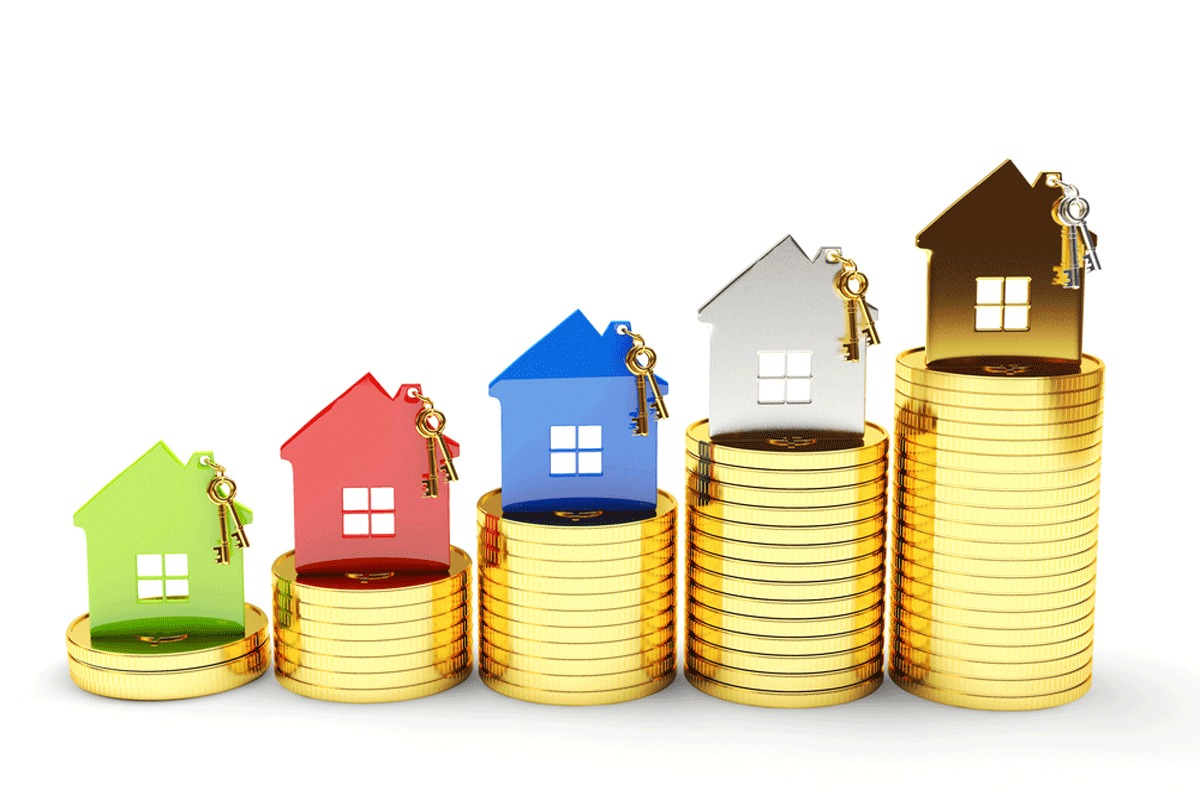

In [1193]:
from IPython.display import Image 
pil_img = Image(filename=r'C:\Users\Tom Lowe\Desktop\Final Project - Tom\2016-House-prices-lead.JPEG')
display(pil_img)

In [1194]:
# Read data file
df = pd.read_csv(r"C:\Users\Tom Lowe\Desktop\Final Project - Tom\DATA\train.csv")

# Data Description 

#### The Raw data that i used has 81 columns, aka, 81 features of houses that went up for sale in Ames City, Iowa (USA). Are they all important to my objective? I can't determine this yet. I will begin by reviewing the factors that I hypothesize to might be significant in their impact on house prices:

<b> LotArea: </b> Lot size in square feet (continues value of size). 

<b> Neighborhood: </b> 25 Neighborhood locations within Ames city limits (Categorial values: textuall names).

<b> BldgType: </b> Type of dwelling (Categorial values: 1Fam=Single-family Detached, 2FmCon=Two-family Conversion, Duplx=Duplex, TwnhsE=Townhouse End Unit, TwnhsI=Townhouse Inside Unit).

<b> HouseStyle: </b> Style of dwelling (Categorial values: 1Story=One Story, 1.5Fin=One and one-half story: 2nd level finished, 1.5Unf=One and one-half story: 2nd level unfinished, 2Story=Two story and so on...).

<b> OverallQual: </b> Rates the overall material and finish of the house (Discrete Ordinal values: from 1=very poor to 10=very excellent).

<b> OverallCond: </b> Rates the overall condition of the house (Discrete Ordinal values: from 1=very poor to 10=very excellent).

<b> YearBuilt: </b> Original construction date (Discrete Datetime values that determine the age of the house).

<b> YearRemodAdd: </b> Remodel date (Discrete Datetime values; Will be the same value as construction date if no remodeling or additions has been made).

<b> ExterQual: </b> Evaluates the quality of the material on the exterior. (Categorial values: Ex=Excellent, Gd=Good, TA=Average, Fa=Fair, Po=Poor). There is another feature called <b> ExterCond </b> which evaluates the present condition of the material on the exterior and gets the same categorial values. 

<b> BsmtCond: </b> Evaluates the general condition of the basement. (Categorial vaules are the same as ExterQual and ExterCond, but with an extra value of NA=No Basement).

<b> HeatingQC: </b> Heating quality and condition. (Categorial values: Ex=Excellent, Gd=Good, TA=Average, Fa=Fair, Po=Poor)

<b> CentralAir: </b> Central air conditioning (Binary values: N=No, Y=Yes).

<b> FullBath: </b> Number of Full bathrooms above grade (Discrete values that indicates the number of full bathroom in the house). There is another feature called <b> HalfBath </b> who do the same for halfbaths. 

<b> KitchenQual: </b> Kitchen quality. (Categorial values: Ex=Excellent, Gd=Good, TA=Average, Fa=Fair, Po=Poor)

<b> TotRmsAbvGrd: </b> Total rooms above grade (Discrete values that indicates the total number of bedrooms in the house (does not include bathrooms, but does include basement bedrooms). 

<b> GarageCars: </b> Size of garage in car capacity (Discrete values that indicates the number of cars that can fit the garage of the house).
 
<b> YrSold: </b> Year Sold YYYY. (Discrete Datetime values).

<b> SaleCondition: </b> Condition of sale. (Categorial values: Normal=Normal Sale; Abnorml=Abnormal Sale -  trade, foreclosure, short sale; AdjLand=Adjoining Land Purchase; Alloca=Allocation - two linked properties with separate deeds, typically condo with a garage unit; Family=Sale between family members; Partial=Home was not completed when last assessed, its associated with New Homes). 

In [1195]:
# Summary the size of the database using f' stirng 
print(f"number of rows : {df.shape[0]} and number of columns : {df.shape[1]}")

number of rows : 1460 and number of columns : 81


###### List all the features in my dataset file:

In [1196]:
# Present column names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

###### Show 5 First Rows of the Dataset file:

In [1197]:
# Show the first 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The Database file has <b> 81 Columns </b> that can get a varity of value types (=81 House Features, before any concessions).
<b> 1460 Rows </b> = 1460  Observations of houses for sale in Ames City, Iowa between the years 2006-2010 (n=1460).

####  In this project, I will use EDA and Feature Engineering to analyze the Iowa Housing Market and to identify features that influence the prices of house sales, hence my objective variable is 'SalePrice'.

In [1198]:
# Identify the target varibale 
df.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [1199]:
# Descriptive statistics of Raw data 
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


###### Descriptive statistics and Extremum of my target variable SalePrice :

In [1200]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Handling Missing Values

In [1201]:
# Check what values are in each column and type of object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1202]:
# How many null values in database
df.isnull().sum().sum()

6965

<b> How many columns (features) with missing values: </b>

In [1203]:
df.isna().any().sum()

19

Because I have too many house features to take into account in my research question, I have to be strict with the dropping of problematic columns. I will drop every feature that had to many missing values, which will leave me with 76 features, to ensure the effectiveness of my analysis.

In [1204]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

 <b> I droped features that mainly hold null values as they are a bad estimate for my target variable (SalePrice), then I will check if there any null values left. If there are missing values left in my data, I will resolve all the missing values by inserting average values (if it's numeric type) or most frequent categorial values (if it's categorial type), so that they don't skew the results. 
</b> 


In [1205]:
# Are there any null values in the dataframe?
df.isnull().values.any()

True

In [1206]:
# Replace empty Float values with the mean value of each variable (average value of column)
table = ["LotFrontage","MasVnrArea","GarageYrBlt","GarageYrBlt"]

for feature in table:
    df[feature] = df[feature].fillna(df[feature].mean())


# Replace empty Categorical values with the most frequent value of each column:
table = ["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
        "Electrical","GarageType","GarageFinish","GarageQual","GarageCond"]

df[table]=df[table].fillna(df.mode().iloc[0])


Making sure there are no null values left:

In [1207]:
df.isnull().values.any()

False

 <b>There are no null values left in my Dataframe!</b>



In [1208]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


<b> As you can see above, in my research question i'm assuming that the Pool quality, Miscellaneous feature, Type of alley access to property, Fence quality, Fireplace quality, are all not significant enough to influence house prices. </b>

After removal, I have 76 house features that have the potential to affect the house prices. 

# Exploratory Data Analysis (EDA)

In [1209]:
# Descriptive statistics of edited data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


###### We can see there were 1460 house sales that went through during 2006-2010 in Ames City, Iowa.

The objective variable, SalePrice has Mean value of 180,921usd, with Standard deviation of 79,443usd, and a Median of 163,000usd.

The cheapest house in this database was sold at Minimum price of 34,900usd, and the most expensive house in this database was sold at Maximum price of 755,000usd.

The LotArea feature, regrading the size of the houses has Mean value of 10,517 square feet, and Median value of 9,478.5, which means half of the houses for sale in Ames City are smaller than 9,478.5 square feet. 

Other interesting stats are the OverallQual and OverallCond, which indicates that the Average Quality of the houses for sale in Ames City is 6.01 (on a scale of 1-10), and the Average Condition of the houses for sale is 5.58, respectively. This indicates that the living standards in this city is relatively reasonable.

YearBuilt feature indicates the age of the houses. The oldest house was built in 1872, and the newest house was built in 2010. The Median points out that half of the houses that went up for sale were built before 1973, which is pretty old. This could be a hint of a shortage trend in new construction in Ames City. 

###### Description of the columns and the type of variables each column receives:

In [1210]:
# How many categories in each column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [1211]:
# Forms and quantity of Ordinal variables
df["Condition1"].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [1212]:
# quantity of Float variables
df.select_dtypes('float').apply(pd.Series.nunique, axis = 0)

LotFrontage    111
MasVnrArea     328
GarageYrBlt     98
dtype: int64

In [1213]:
# quantity of Int variables
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

Id               1460
MSSubClass         15
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

<b> I'll continue with analysis of one of the features that i think can influence my target variable - The Condition of Sale: </b>
The SaleCondition feature gets Categorial values that explain what kind of transaction has been made to buy the house (The feature is fully detailed above at the Data Description section). 

For Example: if a house was sold under Abnormal Sale condition or the transaction was between family members, I guess this will have a significant impact on the price of the house. 

In [1214]:
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

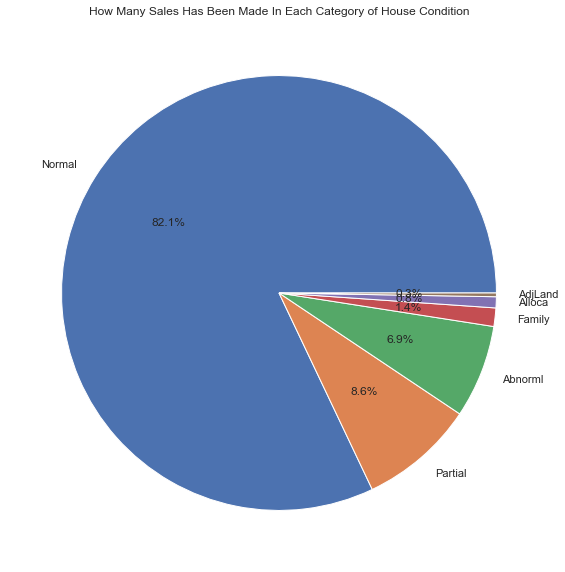

In [1215]:
sch = df['SaleCondition'].value_counts().to_dict()
plt.figure(figsize=(10,10))
plt.pie(x=sch.values(), labels=sch.keys(), autopct='%1.1f%%')
plt.title("How Many Sales Has Been Made In Each Category of House Condition")
plt.show()

Due to the fact that the vast majority of house purchases were made under Normal Conditions, I reject my initial hypothesis that this variable is significant enough to have any impact on house sale prices (my target variable).

<b> Next, I will examine the distribution of the years in terms of the amount of house sales. Is there a specific year with significantly more transactions? </b>

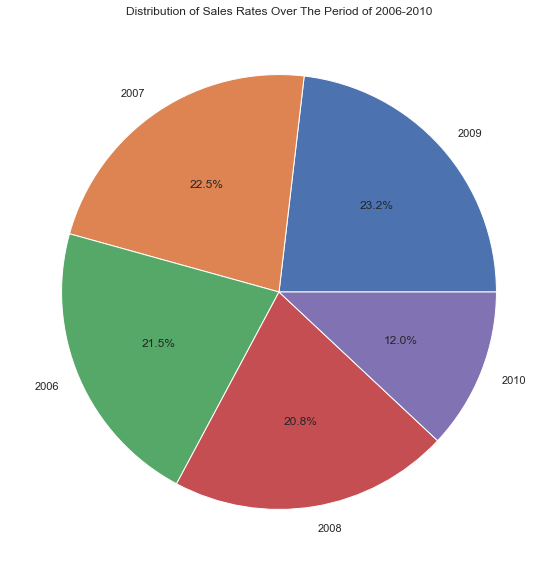

In [1216]:
sch = df['YrSold'].value_counts().to_dict()
plt.figure(figsize=(10,10))
plt.pie(x=sch.values(), labels=sch.keys(), autopct='%1.1f%%')
plt.title("Distribution of Sales Rates Over The Period of 2006-2010")
plt.show()

We can see that house sales quantity is splited pretty equaly between the years.

<b> Now i will analyze the role of the Neighborhood in the Housing Market of Ames City, Iowa: </b> 

C:\Users\Tom Lowe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

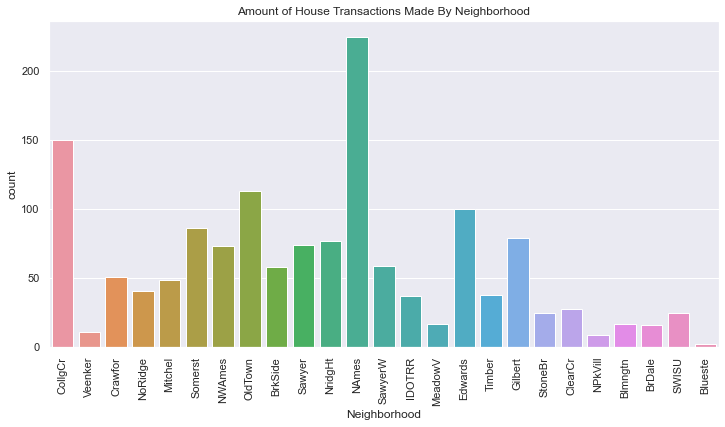

In [1217]:
plt.figure(figsize=(12,6))
sns.set(style='darkgrid')
sns.countplot(df['Neighborhood'])
plt.title("Amount of House Transactions Made By Neighborhood")
plt.xticks(rotation=90)

The TOP3 Neighborhoods regarding the amount of house transactions made there are: North Ames (Names) with more than 250 houses sold, College Creek (CollgCr) with ~150 houses sold, and the Old Town with more than 100 houses sold. This information can guide real estate investors who want to buy houses for effective House Flipping. 

Text(0.5, 0, 'SalePrice')

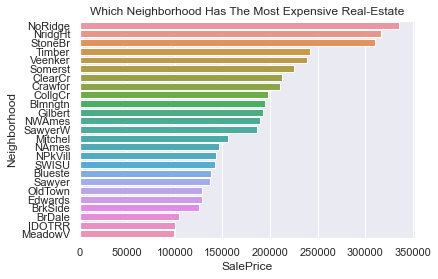

In [1218]:
# Neighborhood vs Mean House Price = Which Neighborhood has the Most Expansive Real Estate
df_Neig_vs_Price = df.groupby(["Neighborhood"], as_index=False).agg({"SalePrice":np.mean})

# Sort the subdata frame by Mean House Price
df_Neig_vs_Price = df_Neig_vs_Price.sort_values(by=["SalePrice"], ascending=False)
sns.barplot(x="SalePrice", y="Neighborhood", data=df_Neig_vs_Price)
plt.title("Which Neighborhood Has The Most Expensive Real-Estate")
plt.ylabel('Neighborhood')
plt.xlabel('SalePrice')

The TOP3 Luxury Neighborhoods where the most expensive houses were sold during 2006-2010 in Ames City are: Northridge, Northridge Heights, Stone Brook. 
All were sold at above 300,000usd on average, and by a significant margin from other neighborhoods.

This plot shows that the identity of the neighborhood has a significant effect on the mean house prices. But, i'm sure that this isn't the only factor in play.

<b> Now to make sure that the Sale Conditions of the houses sold in those Hot Neighborhood didn't lead to any bias in the results, I'll check that there was no specific concentration of special buying conditions in a particular neighborhood: </b>

In [1219]:
# Chcking the Sale Condition of the Houses that were sold by Neighborhoods
df.groupby(["SaleCondition","Neighborhood"]).size().reset_index().pivot(columns='SaleCondition', index="Neighborhood", values=0)

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Neighborhood,,,,,,
Blmngtn,NaN,NaN,NaN,NaN,12.0,5.0
Blueste,NaN,NaN,NaN,NaN,2.0,NaN
BrDale,3.0,NaN,NaN,1.0,12.0,NaN
BrkSide,3.0,NaN,NaN,1.0,54.0,NaN
ClearCr,3.0,NaN,NaN,NaN,24.0,1.0
CollgCr,3.0,NaN,NaN,NaN,129.0,18.0
Crawfor,3.0,NaN,2.0,2.0,43.0,1.0
Edwards,8.0,4.0,2.0,NaN,82.0,4.0
Gilbert,1.0,NaN,NaN,2.0,64.0,12.0


In [1220]:
df_neigb_condition_sale =df.groupby(["SaleCondition","Neighborhood"]).size().reset_index().pivot(columns='Neighborhood', index="SaleCondition", values=0)

<AxesSubplot:xlabel='Neighborhood'>

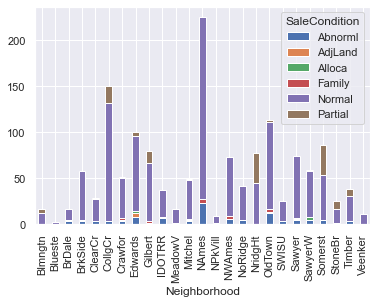

In [1221]:
fig, ax = plt.subplots()
df_plot=df_neigb_condition_sale
df_plot
#plt.xlabel("group study")
df_plot.T.plot(kind='bar', stacked=True, ax=ax)

From this fig I can't really extract significant insights. The Second most popular Neighborhood in house sales, College Creek has a high ratio of Partial Sale Conidion, which is associated with New Homes. But it makes sense that a place with high rate of house transactions would have a decent amount of new houses for sale. And even if I would remove those Partial house sales from record of College Creek, it would still keep the 2nd place for amount of house sales. I can say the same about North Ames Neighborhood, and it's rate of Abnormal Sales Condition. 

<b> Now I'll check the factor of the Style of the house ('HouseStyle' variable) and it's influence on the sale price of houses </b> - This can tell us if there any fasion trends or preference to a specific house style in Ames City, Iowa.

In [1222]:
df_HouseStyle_YrSold=df.groupby(["HouseStyle","YrSold"]).size().reset_index().pivot(columns='YrSold', index="HouseStyle", values=0)

In [1223]:
df_HouseStyle_YrSold

YrSold,2006,2007,2008,2009,2010
HouseStyle,,,,,
1.5Fin,34.0,28.0,37.0,39.0,16.0
1.5Unf,1.0,7.0,3.0,3.0,NaN
1Story,151.0,167.0,146.0,167.0,95.0
2.5Fin,2.0,1.0,3.0,2.0,NaN
2.5Unf,2.0,4.0,3.0,2.0,NaN
2Story,101.0,99.0,92.0,102.0,51.0
SFoyer,8.0,9.0,5.0,9.0,6.0
SLvl,15.0,14.0,15.0,14.0,7.0


<AxesSubplot:xlabel='YrSold'>

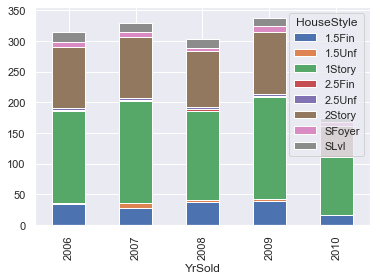

In [1224]:
fig, ax = plt.subplots()
df_plot=df_HouseStyle_YrSold
df_plot
#plt.xlabel("group study")
df_plot.T.plot(kind='bar', stacked=True, ax=ax)

So it's pretty clear that the most popular house style for sale in Ames City, Iowa for 2006-2010 is the One story house, after that comes the Two story house, and the 3rd place goes to the One and one-half story (with 2nd level finished). 

<b> But how it would affect the sale price of houses? </b>

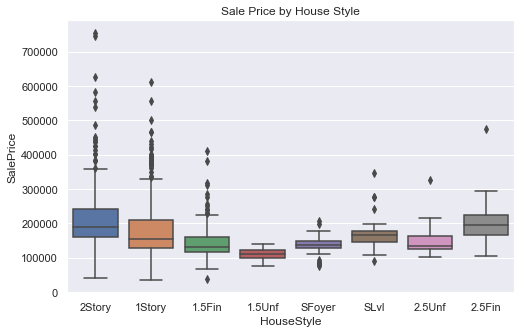

In [1225]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['HouseStyle'], y=df['SalePrice'])

plt.title("Sale Price by House Style")
plt.ylabel('SalePrice')
plt.xlabel('HouseStyle')
plt.show()

We can observe that the 2 Story houses are the most expansive house style, after that the 1 Story houses is the second most expansive house style. This correlates with the popularity of this house styles, and can be explained by a culture prefrences of the american house holders, or any functional reasoning behind it.

We can't say the same for the 1.5 story (2nd level finished) house style as it's price range is similar to other house styles. However, there is the more rare house style of 2.5 Story (3rd level finished) that seems to be increasing the Sale Price of the house, which makes sense due to its multiple floors and size, but it's not that common. 

<b> In this section, I'll test the influence of the LotArea feature - that is the size of the house in squere feet. In Israel we know that most of the times, when the house is bigger, so is it's price. But is it also true for Ames City? </b>

In [1226]:
df.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [1227]:
df['LotArea'].corr(df['SalePrice'])

0.26384335387140573

It's a bit of a surprise, but it seems that there is only weak correlation between the Size of the lot and it's Sale Price. 

Text(0, 0.5, 'Sale Price')

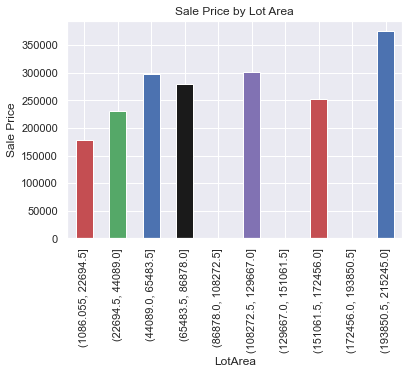

In [1228]:
df['SalePrice'].groupby(pd.cut(df['LotArea'], 10)).mean().plot(kind='bar', color=list('rgbkymc'))
plt.title("Sale Price by Lot Area")
plt.ylabel("Sale Price")

Apart from the unusually large house with an unusual high price, we can't see anything that would suggest that there is a strong link between the Size of the house and the Sale Price.

<b> Next, I will examine the influence of the Overall Quality and Condition of the houses on my target variable, House Sale Price: </b>

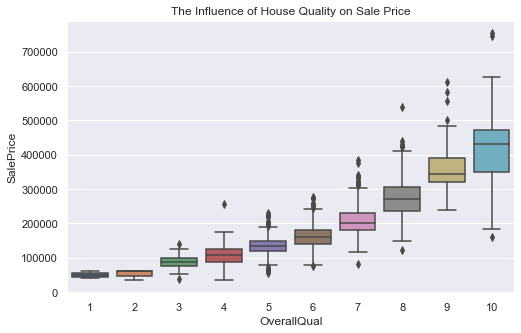

In [1229]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])

plt.title("The Influence of House Quality on Sale Price")
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.show()

In [1230]:
df['OverallQual'].corr(df['SalePrice'])

0.7909816005838047

As we would assume, there is a clear linear relationship between the Overall Quality of the House and it's Selling Price. No surprises there. 

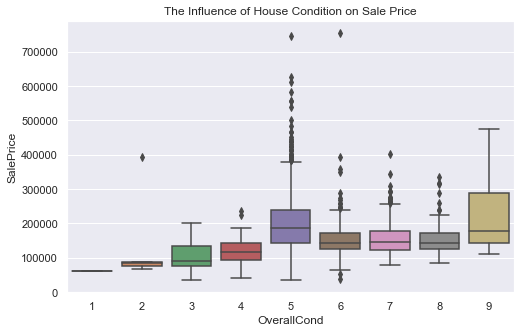

In [1231]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['OverallCond'], y=df['SalePrice'])

plt.title("The Influence of House Condition on Sale Price")
plt.ylabel('SalePrice')
plt.xlabel('OverallCond')
plt.show()

Regarding the Overall House Condition, unlike the Overall House Quality, the Linear connection between the house condition and the sale price is not that clear. Nevertheless, we can still identify a growing positive trend between those 2 features.  

(array([2005.5, 2006. , 2006.5, 2007. , 2007.5, 2008. , 2008.5, 2009. ,
        2009.5, 2010. , 2010.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

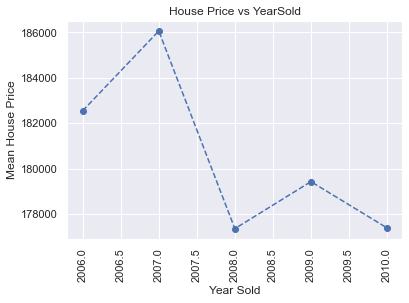

In [1232]:
df.groupby('YrSold')['SalePrice'].mean().plot(linestyle='--', marker='o', color='b')
plt.xlabel('Year Sold')
plt.ylabel('Mean House Price')
plt.title("House Price vs YearSold")
plt.xticks(rotation=90)

#### This stats are actually consistent with the market collapse in 07'-08'!
We can clearly see the bursting of the United States housing bubble.

<b> Early 2000's: </b> The financial crisis was primarily caused by deregulation in the mortgages system. That permitted banks to engage in hedge fund trading with derivatives. Banks then demanded more mortgages to support the profitable sale of these derivatives. They created interest-only loans that became affordable to subprime borrowers. 

<b> 2001-2007: </b> Derivatives were created from subprime residential mortgages, and demand for homes skyrocketed. We can see that sharp rise in house prices of our Database.

<b> 2007-2008: Crash of the American housing market culminated in a "perfect storm" - </b> When the Federal Reserve raised interest rates, average middle-class mortgage borrowers could no longer afford their mortgages. The supply of houses outran demand, borrowers defaulted on their mortgages, and house prices plunged.

<b> After 2008: </b> We can see some correction trend of the American housing market, but it will take many more years to reach market normalization.

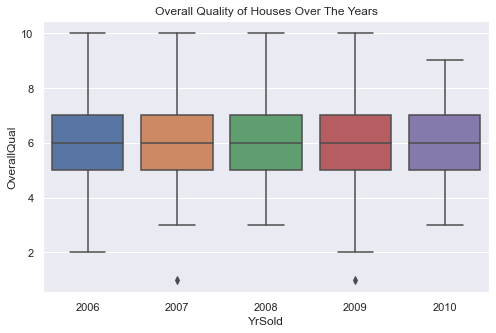

In [1233]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['YrSold'], y=df['OverallQual'])

plt.title("Overall Quality of Houses Over The Years")
plt.ylabel('OverallQual')
plt.xlabel('YrSold')
plt.show()

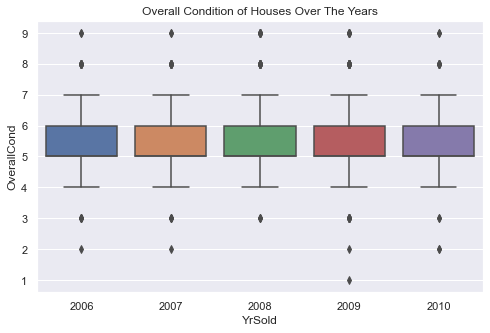

In [1234]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['YrSold'], y=df['OverallCond'])

plt.title("Overall Condition of Houses Over The Years")
plt.ylabel('OverallCond')
plt.xlabel('YrSold')
plt.show()

<b> To reinforce my main calim that the driver of the U.S. house prices drop is indeed due to the bursting of the real-estate bubble, and no any other relevant factor. I chose to present the stats showing that there was no decrease or any change whatsoever in the Overall Quality or Overall Condition of houses for sale between 2006-2010. </b> You can see that these features are evenly distributed over the years and therefore it can not be determined that they played a role in the drastic decline in apartment prices in 2007. Moreover, the house sales quantity is splited pretty equaly between 2006 and 2010, so a decline in house transactions rate can't be the reason.

# Feature Engineering

In this section I will create a new feature that determines if a specific house is old and un-remodeled by using the YearBuilt feature and YearRemodAdd feature. Maybe it will help us to learn about the importance of home remodeling in the American Housing Market.

In [1235]:
select_important_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [1236]:
print(f"number of selected columns without the sell price column : {len(select_important_features)}")

number of selected columns without the sell price column : 38


In [1237]:
for feature in select_important_features:
    df_tmp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=df_tmp[df_tmp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'insgnigicant_var')

In [1238]:
 df[feature].head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

I'll take into account 3 features: House Sale Price, The age of the house (YearBuilt), and when it was Remodeld:

In [1239]:
select_important_features_and_sales = [feature for feature in df.columns if df[feature].dtypes =='O' or feature=="SalePrice"  or feature =="YearRemodAdd" or feature =="YearBuilt"]

In [1240]:
only_select_important_columns = df.columns[df.columns.isin(select_important_features_and_sales)]

In [1241]:
df_importance = df[only_select_important_columns]

In [1242]:
df_importance

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,insgnigicant_var,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,142125


In [1243]:
df_importance.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,insgnigicant_var,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [1244]:
# The "Old House or Remodeld House" Column:
df_importance["Old House or Remodeld House"] = df_importance["YearRemodAdd"] - df_importance["YearBuilt"]

<ipython-input-1244-a6148f5d77cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance["Old House or Remodeld House"] = df_importance["YearRemodAdd"] - df_importance["YearBuilt"]


In [1245]:
# Which houses hasnt been remodeled over 100 years!
df_importance[df_importance["Old House or Remodeld House"].sort_values(ascending=False)>100]["Old House or Remodeld House"]

<ipython-input-1245-dade3defe9ac>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_importance[df_importance["Old House or Remodeld House"].sort_values(ascending=False)>100]["Old House or Remodeld House"]


106     110
185     101
304     122
583     107
630     111
716     108
747     123
921     103
945     106
991     104
1137    121
1349    115
Name: Old House or Remodeld House, dtype: int64

In [1246]:
df_importance[df_importance["Old House or Remodeld House"].sort_values(ascending=False)>100]["SalePrice"]

<ipython-input-1246-afce4cc1940e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_importance[df_importance["Old House or Remodeld House"].sort_values(ascending=False)>100]["SalePrice"]


106     100000
185     475000
304     295000
583     325000
630     124000
716     159500
747     265979
921     145900
945     124900
991     168000
1137     94000
1349    122000
Name: SalePrice, dtype: int64

Which houses are really old and haven't got remodeld:
Houses that are over 100 years old counts as Old and if it hasen't been remodeld latly.

Lets see which are the really old houses and their features:

In [1247]:
 df_importance[df_importance["Old House or Remodeld House"]>100]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,Old House or Remodeld House
106,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,Typ,Detchd,Unf,Fa,Fa,N,WD,Normal,100000,110
185,RM,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,Typ,Detchd,Unf,insgnigicant_var,TA,Y,WD,Normal,475000,101
304,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,295000,122
583,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,insgnigicant_var,...,Typ,Detchd,Unf,insgnigicant_var,TA,Y,WD,Normal,325000,107
630,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,...,Typ,Detchd,Unf,Fa,insgnigicant_var,N,WD,Abnorml,124000,111
716,RM,Pave,Reg,Bnk,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,Typ,Detchd,Unf,TA,TA,P,WD,Normal,159500,108
747,RM,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,...,Typ,Detchd,Unf,TA,TA,N,WD,Normal,265979,123
921,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,...,Typ,Attchd,Unf,TA,TA,N,WD,Normal,145900,103
945,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,...,Typ,Detchd,Unf,TA,TA,Y,WD,Normal,124900,106
991,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,...,Typ,Attchd,Unf,TA,TA,P,WD,Normal,168000,104


It was obvious that most of the old houses would be in the Old Town of Ames City. As it happenes that is one of the most expensive Neighborhood in the city. I would assume that old and un-remodeld houses whould be cheaper than the average price of the market, but it seems that this isn't the case. The reasoning behind it could be that the Old Town is a vibrante and central area with overpriced real-estate, or a touristy quarter.

In [1248]:
# Mean Sale Price reminder:
df_importance["SalePrice"].mean()

180921.19589041095

In [1249]:
# Differnce between the price of the not remodeld over than 100 years with the AVG of SalePrice from the data
abs(df_importance[df_importance["Old House or Remodeld House"]>100]["SalePrice"] -df_importance["SalePrice"].mean()).sort_values(ascending=False)

185     294078.80411
583     144078.80411
304     114078.80411
1137     86921.19589
747      85057.80411
106      80921.19589
1349     58921.19589
630      56921.19589
945      56021.19589
921      35021.19589
716      21421.19589
991      12921.19589
Name: SalePrice, dtype: float64

In [1250]:
change_data = pd.get_dummies(df_importance)
change_data.shape

(1460, 188)

In [1251]:
change_data.head()

,YearBuilt,YearRemodAdd,SalePrice,Old House or Remodeld House,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_insgnigicant_var,Street_Pave,...,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_WD,SaleType_insgnigicant_var,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_insgnigicant_var
0,2003,2003,208500,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,1976,1976,181500,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,2001,2002,223500,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
3,1915,1970,140000,55,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,0
4,2000,2000,250000,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


Class that tells you if the House Transaction was a 'HOT Sale' (= the house was not remodled lately and its pretty old, but still sold for an above average price), or was it a 'Normal Sale'. You will also get the price difference of the specific sale price from the mean sale price.

In [1252]:
class house_deal():
    def __init__(self,house,Price):
        self.Price = Price
        self.house = house
    
    def caculation_should_buy(self):
        if self.house >50 and self.Price>180921.19589041095:
            diff_price = self.Price-180921.19589041095
            print(f"Hot Sale!!! :)    Price: {self.Price} ,Not Remodled for: {self.house} years, and the margin from Average House Price: {diff_price}")
        else:
            print("Normal Sale ):")


       

<b> Example of a HOT Sale: </b>

In [1253]:
should_buy_or_not = house_deal(house=51,Price=200000.0)

In [1254]:
should_buy_or_not.caculation_should_buy()

Hot Sale!!! :)    Price: 200000.0 ,Not Remodled for: 51 years, and the margin from Average House Price: 19078.80410958905


<b> Example of a Normal Sale: </b>

In [1255]:
should_buy_or_not = house_deal(house=21,Price=200000.0)

In [1256]:
should_buy_or_not.caculation_should_buy()

Normal Sale ):


#  Main Takeaways:

- The house features: Pool quality, Miscellaneous feature, Type of alley access to property, Fence quality, Fireplace quality, are all not significant enough to influence the house prices.
- The Sale Condition of the house is not significant enough to have any impact on house sale prices, mainly because the vast majority of real estate transactions are made under Normal Sale Conditions. 
- I couldn't find anything that would suggest that there is a strong link between the Size of the house and it's Sale Price.
- The 3 most popular house styles in Ames City, Iowa for 2006-2010 are: One story houses, Two story houses, and 1.5 story (with 2nd level finished). One story and Two story houses have positive influence on house sale prices, but I can't determine the same on the 1.5 story house which had no strong connection with higher prices. 
- There is a clear linear relationship between the Quality of the House and it's Selling Price. The Overall Quality of the House is an important factor that influence positively on the Price. However, The Overall Condition of the House did not had such strong link with the House Sale Price. I could still identify a positive trend that can hint to a correlation, but it's not that unambiguous like the effect of the Overall Quality.
- The TOP3 Neighborhoods for the most house transactions that took place there are (Quantity wise) during 2006-2010 in Ames City are: North Ames (Names) with more than 250 houses sold, College Creek (CollgCr) with ~150 houses sold, and the Old Town with more than 100 houses sold.
- The TOP3 Luxury Neighborhoods where the most expensive houses were sold for over a mean price of 300,000usd during 2006-2010 in Ames City are: Northridge, Northridge Heights, Stone Brook. 
- The Overall Quality and Condition of the houses in the Ames City real estate market during 2006-2010 did not differ significantly over the period. And old houses doesn't necessarily mean cheap houses.

<b> Main Outcome: </b> My conclusion from this project is that the major factor that influence house sale prices in Ames City, Iowa, during the year 2006-2010 is the catastrophic effect of the bursting of the US housing market bubble which slashed house prices and had a negative impact all over the world.

<b> Submitted by: </b> Tom Lowe

<b> Date: </b> 27/01/2022

### Reference:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview